##PHASE 1 PROJECT

Student name: ANTHONY MANYURA <br>
Student pace: part time <br>
Scheduled project review date/time: 28/07/2024<br>
Instructor name: SAMUEL JANE <BR>
Blog post URL:

#Loading data

Importing the pandas library, numpy, matplotlib.
<br>
The libraries are imported a number of times due to the google collab disconnecting a couple of times.

CSV Files used are<br>


1.   bom.movie_gross.csv
2.   title.basics.csv
3. title.ratings.csv




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_bom = pd.read_csv('bom.movie_gross.csv')
df_bom
df_basics = pd.read_csv('title.basics.csv')
df_basics
df_ratings = pd.read_csv('title.ratings.csv')


We can preview a few rows of each file imported using .head which displays the first five rows

In [ ]:
#1st 5 rows of df_bom
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
#1st 5 rows of df_basics
df_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [ ]:
#1st 5 rows of df_ratings
df_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Use .rename feature to rename the columun so that they match with the corresponding column in the other file imported

In [ ]:
#rename 'title' in df_basics to 'primary title'
df_basics.rename(columns={'title': 'primary_title'}, inplace=True)
df_bom.head()
df_bom.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

After renaming we are now able to merge the three files and have all the required data in one dataframe

In [ ]:
#rename 'title' in df_basics to 'primary title'
df_basics.rename(columns={'title': 'primary_title'}, inplace=True)

#rename 'title' column in df_bom to 'primary_title'
df_bom.rename(columns={'title': 'primary_title'}, inplace=True)

#merge the data frames
df_merged = pd.merge(df_bom, df_basics, on='primary_title', how='left')
df_merged.head()

,primary_title,studio,domestic_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy"
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi"
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy"


We merge two file at a time, we merged the first two then after that merge the third file as the last

In [ ]:
# Merge df_merged with df_ratings on 'tconst'
df_movies = pd.merge(df_merged, df_ratings, on='tconst', how='left')
df_movies.head()
df_movies.iloc[12:20]

,primary_title,studio,domestic_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
12,The King's Speech,Wein.,135500000.0,275400000,2010,tt1504320,The King's Speech,2010.0,118.0,"Biography,Drama,History",8.0,593629.0
13,Tron Legacy,BV,172100000.0,228000000,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,The Karate Kid,Sony,176600000.0,182500000,2010,tt1155076,The Karate Kid,2010.0,140.0,"Action,Drama,Family",6.2,146401.0
15,Prince of Persia: The Sands of Time,BV,90800000.0,245600000,2010,tt0473075,Prince of Persia: The Sands of Time,2010.0,116.0,"Action,Adventure,Fantasy",6.6,254975.0
16,Black Swan,FoxS,107000000.0,222400000,2010,tt0947798,Black Swan,2010.0,108.0,"Drama,Thriller",8.0,648854.0
17,Megamind,P/DW,148400000.0,173500000,2010,tt1001526,Megamind,2010.0,95.0,"Action,Animation,Comedy",7.3,207488.0
18,Robin Hood,Uni.,105300000.0,216400000,2010,tt0955308,Robin Hood,2010.0,140.0,"Action,Adventure,Drama",6.6,239480.0
19,Robin Hood,Uni.,105300000.0,216400000,2010,tt2363363,Robin Hood,2013.0,92.0,"Action,Drama",6.3,78.0


the .iloc above was used to preview the newly foemed merged dataframe, instead of using .head which only previews the first five

Having merged the three csv files it will make easy referncing and calling .

##Getting summaries information about the dataframe

using .info

In [ ]:
#information on the new merged data set
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147 entries, 0 to 4146
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    4147 non-null   object 
 1   studio           4142 non-null   object 
 2   domestic_gross   4112 non-null   float64
 3   foreign_gross    2516 non-null   object 
 4   year             4147 non-null   int64  
 5   tconst           3366 non-null   object 
 6   original_title   3366 non-null   object 
 7   start_year       3366 non-null   float64
 8   runtime_minutes  3198 non-null   float64
 9   genres           3326 non-null   object 
 10  averagerating    3027 non-null   float64
 11  numvotes         3027 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 388.9+ KB


In [ ]:
#statistical summaries of the dataset
df_movies.describe()

,domestic_gross,year,start_year,runtime_minutes,averagerating,numvotes
count,4.112000e+03,4147.000000,3366.000000,3198.000000,3027.000000,3.027000e+03
mean,2.830334e+07,2013.985532,2013.957516,104.900876,6.457582,6.170030e+04
std,6.513110e+07,2.484158,2.530699,24.829941,1.012277,1.255132e+05
min,1.000000e+02,2010.000000,2010.000000,2.000000,1.600000,5.000000e+00
25%,1.200000e+05,2012.000000,2012.000000,92.000000,5.900000,2.117000e+03
50%,1.500000e+06,2014.000000,2014.000000,103.000000,6.600000,1.310900e+04
75%,2.810000e+07,2016.000000,2016.000000,117.000000,7.100000,6.276550e+04
max,9.367000e+08,2018.000000,2020.000000,623.000000,9.200000,1.841066e+06


Grouping the data according to genre

In [ ]:
# Split the 'genres' column and keep only the first genre ,since some entries are grouped in more than one genre, we
# will pick the first genre listed and use it to group the movie
df_movies['first_genre'] = df_movies['genres'].str.split(',').str[0]

# Using value counts we can count number of movies in each group created
genre_counts = df_movies['first_genre'].value_counts()

# Create a new DataFrame from the genre counts
df_genre_counts = pd.DataFrame({'Genre': genre_counts.index, 'Count': genre_counts.values})

print(df_genre_counts)

          Genre  Count
0         Drama    866
1        Action    664
2        Comedy    652
3     Biography    272
4   Documentary    239
5     Adventure    219
6         Crime    147
7        Horror    127
8     Animation     41
9      Thriller     39
10      Fantasy     17
11      Romance     13
12      Mystery     12
13       Family      8
14       Sci-Fi      5
15        Music      2
16      History      1
17        Sport      1
18      Western      1


Now we try create a dataframe focusing on genres and their details.

In [ ]:
# Split the 'genres' column and keep only the first genre
df_movies['first_genre'] = df_movies['genres'].str.split(',').str[0]

# Convert 'domestic_gross' and 'foreign_gross' to numeric, handling errors
df_movies['domestic_gross'] = pd.to_numeric(df_movies['domestic_gross'], errors='coerce')
df_movies['foreign_gross'] = pd.to_numeric(df_movies['foreign_gross'], errors='coerce')

# Group by first genre and sum the gross values
genre_domestic_gross = df_movies.groupby('first_genre')['domestic_gross'].sum()
genre_foreign_gross = df_movies.groupby('first_genre')['foreign_gross'].sum()

# Create a new DataFrame from the genre counts and gross sums
df_genre_counts = pd.DataFrame({
    'Genre': genre_domestic_gross.index,
    'Domestic Gross Total': genre_domestic_gross.values,
    'Foreign Gross Total': genre_foreign_gross.values
})

print(df_genre_counts)

          Genre  Domestic Gross Total  Foreign Gross Total
0        Action          3.843915e+10         6.900419e+10
1     Adventure          1.561104e+10         2.962314e+10
2     Animation          1.295530e+09         2.643218e+09
3     Biography          5.506764e+09         5.904632e+09
4        Comedy          1.296519e+10         1.265919e+10
5         Crime          2.420496e+09         2.650973e+09
6   Documentary          4.039958e+09         4.602649e+09
7         Drama          1.117403e+10         1.386261e+10
8        Family          3.831970e+08         5.907000e+08
9       Fantasy          6.343851e+08         1.087500e+09
10      History          1.120000e+07         2.350000e+07
11       Horror          3.963662e+09         4.949554e+09
12        Music          3.672000e+06         4.600000e+06
13      Mystery          4.436370e+08         5.517000e+08
14      Romance          1.267073e+08         1.982660e+08
15       Sci-Fi          4.151001e+08         4.093000e+

In [ ]:
# Split the 'genres' column and keep only the first genre (HAVING THIS CODE each time PREVENTS GROUPING one movie in multiple genres)
df_movies['first_genre'] = df_movies['genres'].str.split(',').str[0]

# Convert numeric columns, handling errors
df_movies['domestic_gross'] = pd.to_numeric(df_movies['domestic_gross'], errors='coerce')
df_movies['foreign_gross'] = pd.to_numeric(df_movies['foreign_gross'], errors='coerce')
df_movies['averagerating'] = pd.to_numeric(df_movies['averagerating'], errors='coerce')
df_movies['runtime_minutes'] = pd.to_numeric(df_movies['runtime_minutes'], errors='coerce')

# Group by first genre and calculate aggregate values
genre_data = df_movies.groupby('first_genre').agg({
    'domestic_gross': 'sum',
    'foreign_gross': 'sum',
    'averagerating': 'mean',
    'runtime_minutes': 'mean'
})

# Create a new DataFrame from the aggregated data
df_genre = pd.DataFrame({
    'Genre': genre_data.index,
    'Domestic Gross Total': genre_data['domestic_gross'].values,
    'Foreign Gross Total': genre_data['foreign_gross'].values,
    'Average Rating': genre_data['averagerating'].values,
    'Average Runtime (minutes)': genre_data['runtime_minutes'].values
})

print(df_genre)

          Genre  Domestic Gross Total  Foreign Gross Total  Average Rating  \
0        Action          3.843915e+10         6.900419e+10        6.275232   
1     Adventure          1.561104e+10         2.962314e+10        6.528505   
2     Animation          1.295530e+09         2.643218e+09        6.786111   
3     Biography          5.506764e+09         5.904632e+09        6.971315   
4        Comedy          1.296519e+10         1.265919e+10        6.246353   
5         Crime          2.420496e+09         2.650973e+09        6.665000   
6   Documentary          4.039958e+09         4.602649e+09        7.238750   
7         Drama          1.117403e+10         1.386261e+10        6.561647   
8        Family          3.831970e+08         5.907000e+08        6.060000   
9       Fantasy          6.343851e+08         1.087500e+09        6.123077   
10      History          1.120000e+07         2.350000e+07             NaN   
11       Horror          3.963662e+09         4.949554e+09      

#Movies and Gross
Now we try investigate which movies are bringing the most and least money

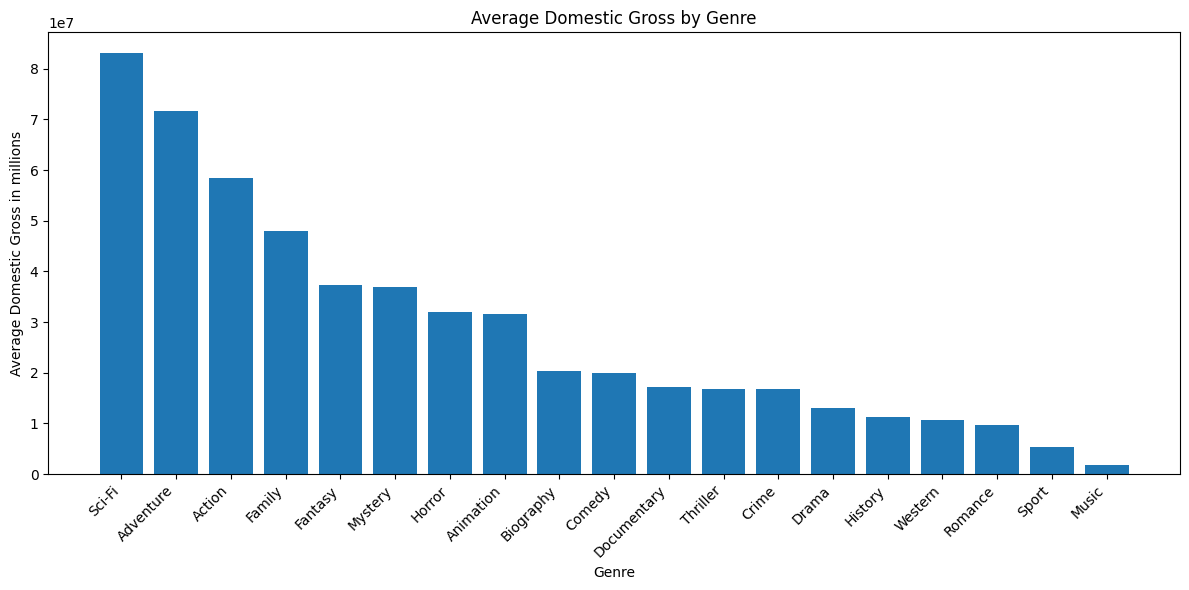

In [ ]:
import matplotlib.pyplot as plt

# Calculate average domestic gross per genre
average_domestic_gross = df_movies.groupby('first_genre')['domestic_gross'].mean()

# Sort by average domestic gross in descending order (for easy identification)
average_domestic_gross_sorted = average_domestic_gross.sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(average_domestic_gross_sorted.index, average_domestic_gross_sorted.values)
plt.xlabel('Genre')
plt.ylabel('Average Domestic Gross in millions')
plt.title('Average Domestic Gross by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Key Observations:<br>
Sci-Fi and Adventure Dominate: These two genres have the highest average domestic gross, significantly surpassing other genres.<br>
Steep Decline: There's a noticeable drop in average domestic gross after Sci-Fi and Adventure, with the following genres (Action, Family, Fantasy) still generating substantial revenue.<br>
Mid-Tier Performance: Genres like Mystery, Horror, Animation, and Biography fall into a mid-tier range of average domestic gross.<br>
Lower-Performing Genres: Genres such as Documentary, Thriller, Crime, Drama, History, Western, Romance, Sport, and Music consistently exhibit lower average domestic gross.<br>

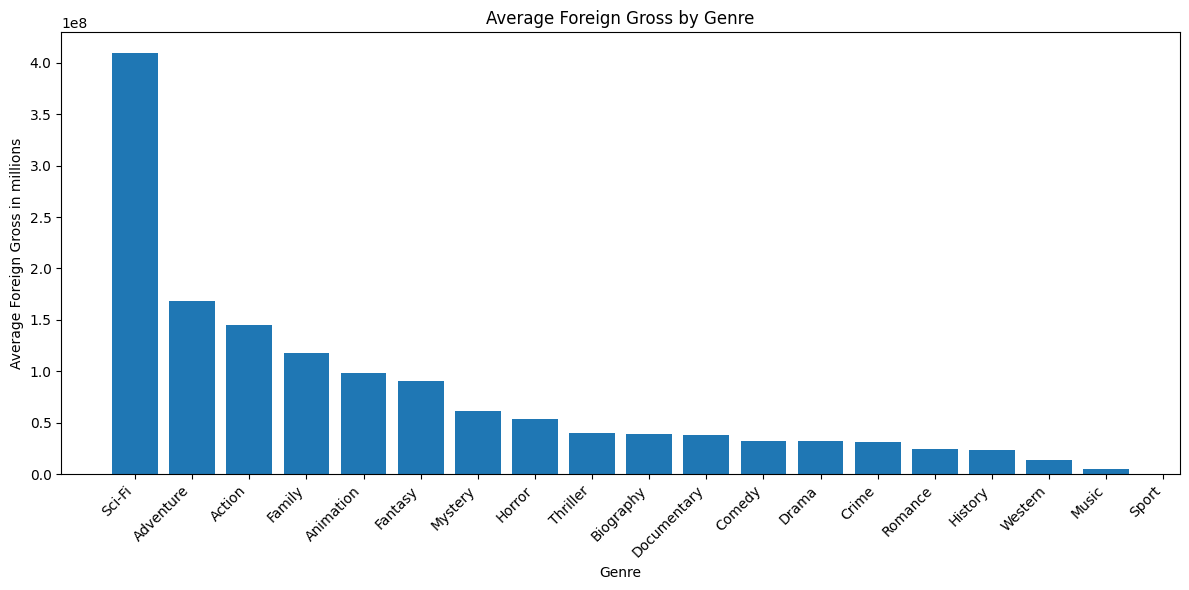

In [ ]:
import matplotlib.pyplot as plt

# Calculate average foreign gross per genre
average_foreign_gross = df_movies.groupby('first_genre')['foreign_gross'].mean()

# Sort by average foreign gross in descending order
average_foreign_gross_sorted = average_foreign_gross.sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(average_foreign_gross_sorted.index, average_foreign_gross_sorted.values)
plt.xlabel('Genre')
plt.ylabel('Average Foreign Gross in millions')
plt.title('Average Foreign Gross by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Key Observations:<br>
Sci-Fi Dominance: Sci-Fi stands out as the genre with the highest average foreign gross, significantly surpassing all other genres.<br>
Adventure and Action Follow: Adventure and Action genres follow closely behind Sci-Fi, indicating strong international appeal.<br>
Steep Decline: There's a noticeable drop in average foreign gross after the top three genres, with the remaining categories showing significantly lower revenue.<br>
Consistent Underperformance: Genres like Documentary, Thriller, Crime, Drama, History, Western, Romance, Music, and Sport consistently exhibit minimal average foreign gross.<br>

Comparison of Domestic and Foreign Gross by Genre<br>
Key Similarities:<br>
Sci-Fi Dominance: Both graphs indicate that Sci-Fi is the top-performing genre in terms of average gross revenue, both domestically and internationally.<br>
Adventure and Action Strength: Adventure and Action consistently rank high in both domestic and foreign markets, demonstrating strong global appeal.<br>
Lower-Tier Performance: Genres such as Documentary, Thriller, Crime, Drama, History, Western, Romance, Music, and Sport generally exhibit lower average revenue in both domestic and foreign markets.<br>
<br>
Key Differences:<br>
Domestic vs. Foreign Revenue: While Sci-Fi leads in both, the gap between Sci-Fi and other genres appears more pronounced in foreign markets.<br>
Genre Variation: Some genres show more variation between domestic and foreign performance. For instance, Animation might rank higher domestically compared to its foreign performance.<br>
Market Specificity:Certain genres might have a stronger following in specific geographic regions, leading to discrepancies between domestic and foreign gross.<br>
Notable Observations:
Global Appeal of Certain Genres: The consistent high performance of Sci-Fi, Adventure, and Action suggests a global audience for these genres.<br>
Domestic vs. Foreign Preferences: Understanding the nuances between domestic and foreign audiences can inform targeted marketing and content development strategies.<br>
Genre Potential: While some genres might underperform in both markets, there could be untapped potential for niche audiences or specific sub-genres.<br>

#Correlations

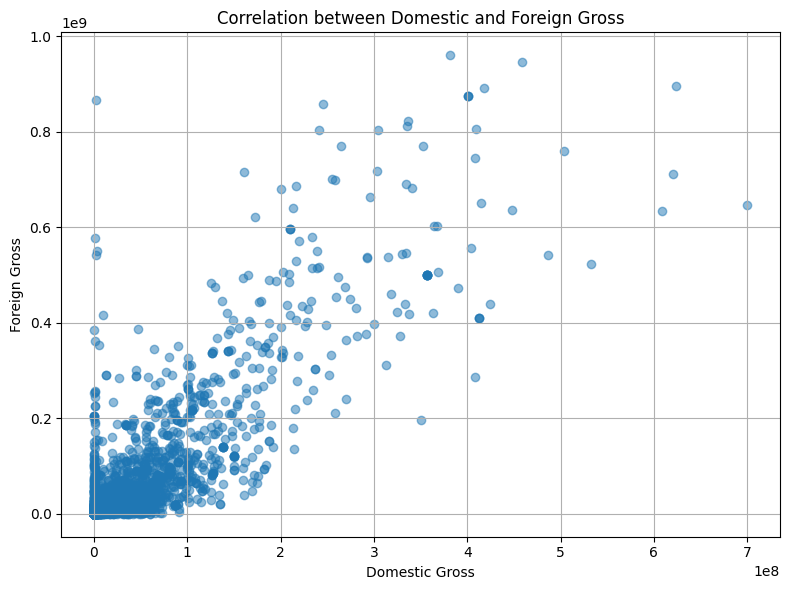

Correlation Coefficient: 0.8329633525493216


In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_movies['domestic_gross'], df_movies['foreign_gross'], alpha=0.5)  # alpha for transparency
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.title('Correlation between Domestic and Foreign Gross')
plt.grid(True)  # Add grid for better visualization
plt.tight_layout()
plt.show()

# Calculate correlation coefficient
correlation_coefficient = df_movies['domestic_gross'].corr(df_movies['foreign_gross'])
print("Correlation Coefficient:", correlation_coefficient)

Key Observations<br>
Positive Correlation: There seems to be a positive correlation between domestic and foreign gross revenue. This means that movies with higher domestic gross tend to also have higher foreign gross.<br>
Clustering: The data points are clustered towards the lower left corner of the plot, indicating that a majority of movies have relatively lower domestic and foreign gross.<br>
Outliers: There are some data points that deviate significantly from the main cluster, representing movies with exceptionally high domestic and foreign gross revenue.<br>
Spread: The data points are spread out, suggesting a moderate correlation between the two variables.

Overall, the scatter plot suggests a moderate positive relationship between domestic and foreign gross revenue, indicating that successful domestic performance often translates to some degree of foreign success.

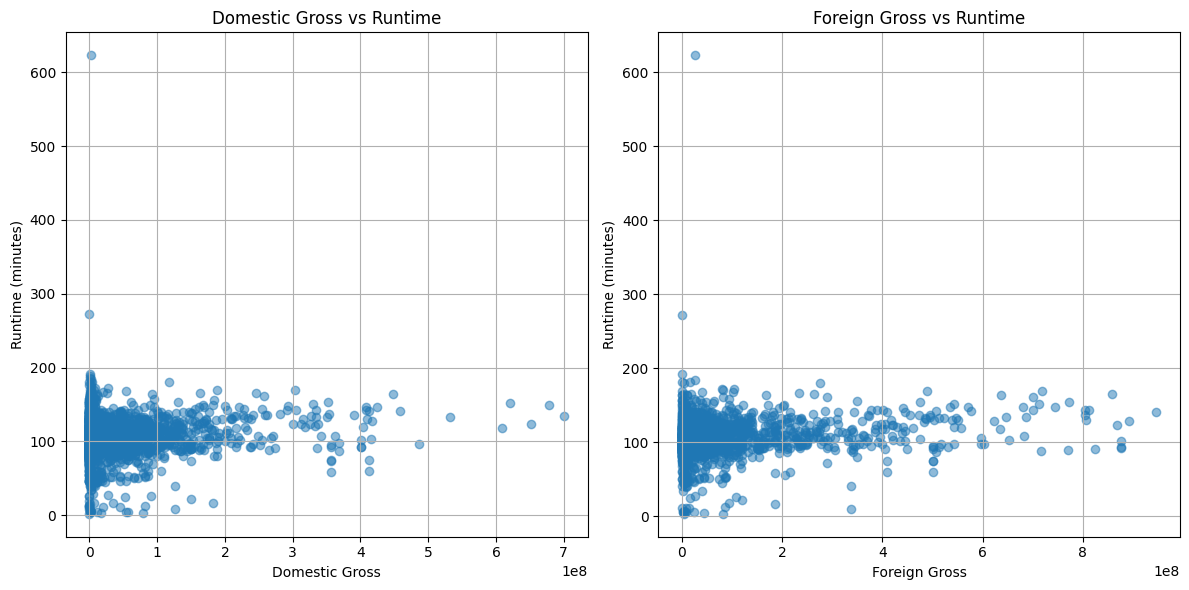

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_movies is available with 'domestic_gross', 'foreign_gross', 'runtime_minutes' columns

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Scatter plot for Domestic Gross vs Runtime
ax1.scatter(df_movies['domestic_gross'], df_movies['runtime_minutes'], alpha=0.5)
ax1.set_xlabel('Domestic Gross')
ax1.set_ylabel('Runtime (minutes)')
ax1.set_title('Domestic Gross vs Runtime')
ax1.grid(True)

# Scatter plot for Foreign Gross vs Runtime
ax2.scatter(df_movies['foreign_gross'], df_movies['runtime_minutes'], alpha=0.5)
ax2.set_xlabel('Foreign Gross')
ax2.set_ylabel('Runtime (minutes)')
ax2.set_title('Foreign Gross vs Runtime')
ax2.grid(True)

plt.tight_layout()
plt.show()

Key Observations<br>
No Clear Correlation: There appears to be no significant correlation between a movie's runtime and its domestic or foreign gross revenue.<br>
Data Dispersion: The data points are widely scattered across the plots, indicating a lack of a consistent pattern.<br>
Outliers: There are some outliers, particularly in the lower right corner of both plots, representing movies with long runtimes but relatively low gross revenue.<br>

There is no apparent correlation between these two variables. This suggests that a movie's financial success is not significantly influenced by its length.

#Distribution


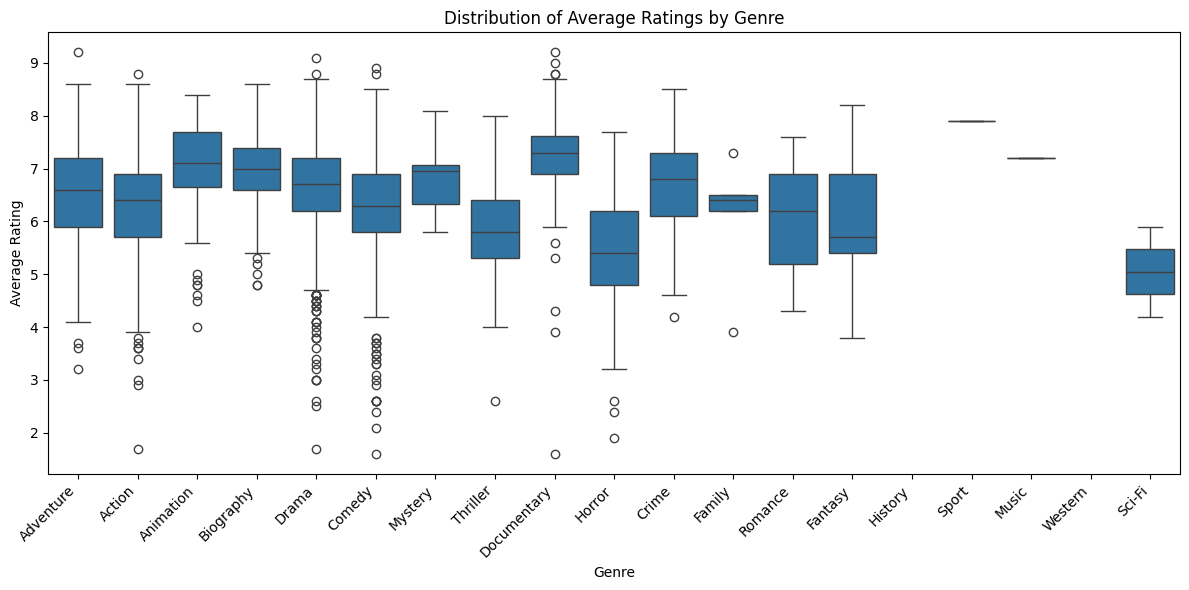

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for enhanced boxplots

# creating boxplot to get distribution of average ratings by genre

plt.figure(figsize=(12, 6))
sns.boxplot(x='first_genre', y='averagerating', data=df_movies)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Distribution of Average Ratings by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Key Observations<br>
Median Ratings: The median average rating varies significantly across genres, with some genres consistently receiving higher ratings than others.<br>
Range of Ratings: The size of the boxes indicates the spread of ratings within each genre. Some genres exhibit a wider range of ratings, while others have a more concentrated distribution.<br>
Outliers: Several genres contain outlier data points, representing movies with exceptionally high or low average ratings compared to the rest of the genre.<br>
Genre Performance: Genres like Adventure, Animation, and Sci-Fi tend to have higher median ratings and fewer outliers, suggesting a more consistent reception from audiences. On the other hand, genres like Horror, Mystery, and Thriller often exhibit lower median ratings and more variability.

##SUMMARY

Analysis indicates that genre significantly influences both domestic and foreign gross revenue, with certain genres consistently outperforming others. Sci-Fi, Adventure, and Action have demonstrated strong performance in both domestic and foreign markets, making them prime candidates for investment.
<br>
However, movie runtime exhibits a negligible correlation with box office success, suggesting that other factors such as genre, star power, marketing, and plot play a more dominant role in determining a film's financial performance.
<br>
Furthermore, the distribution of average ratings across different genres indicates varying levels of audience reception. While some genres consistently garner higher ratings, others exhibit a wider range of audience opinions.
<br>
To maximize box office returns, Microsoft should prioritize Sci-Fi, Adventure, and Action genres for both domestic and foreign markets. These genres have proven to be reliable performers and have a broad audience appeal. Additionally, exploring opportunities within other genres, such as Animation or Family, could be beneficial, especially when targeting specific demographics or regions.
<br>
It's essential to conduct further in-depth analysis to identify specific sub-genres or target audiences within each genre to optimize market penetration. By combining genre analysis with audience segmentation and competitive intelligence, studios can make data-driven decisions to increase their chances of box office success.
<br>
In conclusion, while genre plays a crucial role in determining a film's financial performance, a holistic approach considering multiple factors is necessary for long-term success.